In [38]:
# Import the necessary libraries
import numpy as np
import pandas as pd

In [39]:
filepath='Food App Reviews.csv'
# Load your dataset and convert the review column to list
data = pd.read_csv(filepath)

In [40]:
# Display the data
data

,Review
0,Delivery was faster than a ninja on caffeine. ...
1,Im pretty sure they had a wall made of recycle...
2,Dude Im not even mad they were late. Food arri...
3,Chhole bhature yaar! Sunday indulgence crispy ...
4,The place had a vibe but I cant quite put my f...
...,...
96,Food arrived. I had a taste. Pretty standard.
97,Food was delivered. I ate. Cant complain.
98,Bao buns? Fluffy clouds of yum. Im in bao heaven.
99,Ugh it was so cozy you wouldnt believe. I mean...


In [41]:
reviews = data['Review'].tolist()
reviews[:5]

['Delivery was faster than a ninja on caffeine. Im ready to chow down!',
 'Im pretty sure they had a wall made of recycled cans. Or was it shoes?',
 'Dude Im not even mad they were late. Food arrived like a surprise party!',
 'Chhole bhature yaar! Sunday indulgence crispy bhature FTW.',
 'The place had a vibe but I cant quite put my finger on it. Hipster? Unicorn?']

## 2. <font color='red'> Use SentenceTransformers to Generate Embeddings </font>

#### **`The Mini-LM-6-v2`** models
In this projectwe'll use a model from the `MiniLM-L6-v2` range of Sentence Transformer models to generate embeddings.


In [42]:
# Install the necessary libraries
# !pip install sentence-transformers

In [43]:
# Import the SentenceTransformer library
from sentence_transformers import SentenceTransformer

In [44]:
# Load the embedding model

model_name = "all-MiniLM-L6-v2"
model = SentenceTransformer(model_name)

In [45]:
# Generate sentence embeddings
embeddings = model.encode(reviews)

In [46]:
embeddings[:5]

array([[-0.02161548, -0.02379036,  0.01384498, ..., -0.06156015,
         0.01630186,  0.00554935],
       [-0.09731579,  0.11076365, -0.01295213, ..., -0.05254163,
         0.01606347,  0.1044776 ],
       [ 0.01570855,  0.01586786,  0.00941277, ...,  0.04045313,
        -0.10674313, -0.01165616],
       [-0.00021842,  0.00209716,  0.04856101, ...,  0.0598907 ,
         0.01927104, -0.05866932],
       [ 0.100491  ,  0.00286917,  0.07733551, ..., -0.04696685,
         0.00199946, -0.01813773]], dtype=float32)

In [47]:
# Size/Dimension of each embedding
embeddings[0].shape


(384,)

## 3. <font color='red'> Visualise the Embeddings through Dimensionality Reduction </font>


[UMAP](https://umap-learn.readthedocs.io/en/latest/) is a powerful tool in Python that can help us perform dimensionality reduction.

In [48]:
# Install the umap-learn library

# !pip install umap-learn

In [49]:
# Import umap for dimensionality reduction and matplotlib for plotting
import warnings
warnings.filterwarnings('ignore')
from umap import UMAP
import matplotlib.pyplot as plt

In [50]:
# Generate tensor embeddings

embeddings = model.encode(reviews, convert_to_tensor=True)

In [51]:
embeddings[:5]

tensor([[-0.0216, -0.0238,  0.0138,  ..., -0.0616,  0.0163,  0.0055],
        [-0.0973,  0.1108, -0.0130,  ..., -0.0525,  0.0161,  0.1045],
        [ 0.0157,  0.0159,  0.0094,  ...,  0.0405, -0.1067, -0.0117],
        [-0.0002,  0.0021,  0.0486,  ...,  0.0599,  0.0193, -0.0587],
        [ 0.1005,  0.0029,  0.0773,  ..., -0.0470,  0.0020, -0.0181]],
       device='mps:0')

In [52]:
# Reduce dimensionality with UMAP
# Move tensor to CPU and convert to numpy
embeddings_np = embeddings.cpu().numpy()

# Reduce dimensionality
reducer = UMAP(n_components=2, metric='cosine')
embeddings_2d = reducer.fit_transform(embeddings_np)

In [53]:
embeddings_2d[:5]

array([[ 6.189684  , 10.094114  ],
       [ 5.9989963 , 13.683962  ],
       [ 5.006446  , 11.380846  ],
       [ 0.64265347,  8.576989  ],
       [ 5.95626   , 14.315952  ]], dtype=float32)

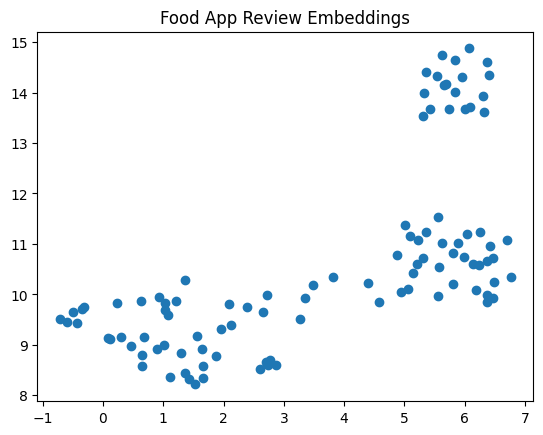

In [54]:
# Plot the embeddings

plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], marker = 'o')
plt.title('Food App Review Embeddings')
plt.show()

## 4. <font color='red'> Cluster and Visualise the Embeddings with Plotly </font>

In [55]:
# Import the KMeans library

from sklearn.cluster import KMeans

In [56]:
# Apply K-means clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(embeddings_2d)

In [57]:
# Add cluster labels as a new column to the DataFrame
data['cluster_label'] = cluster_labels

In [58]:
data.head()

,Review,cluster_label
0,Delivery was faster than a ninja on caffeine. ...,0
1,Im pretty sure they had a wall made of recycle...,2
2,Dude Im not even mad they were late. Food arri...,0
3,Chhole bhature yaar! Sunday indulgence crispy ...,1
4,The place had a vibe but I cant quite put my f...,2


In [59]:
# !pip install plotly

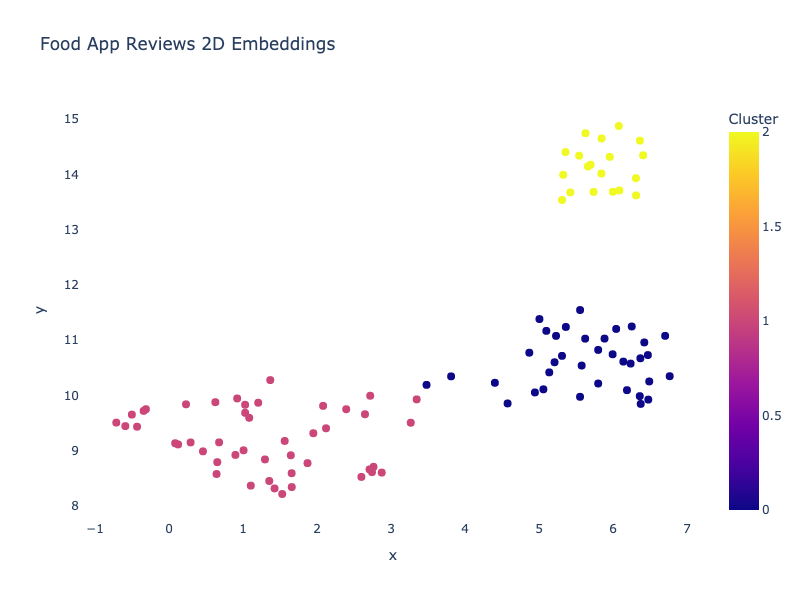

In [60]:
import plotly.express as px

# Create a DataFrame for the data
cluster_df = pd.DataFrame({
    'x': embeddings_2d[:, 0],
    'y': embeddings_2d[:, 1],
    'label': cluster_labels,
    'sentence': data['Review']
})

# Create an interactive scatter plot using plotly
fig = px.scatter(
    cluster_df,
    x='x', y='y',
    color='label',
    hover_name='sentence',
    title='Food App Reviews 2D Embeddings',
    labels={'label': 'Cluster'},
    width=800,  # Adjust the width as desired
    height=600,  # Adjust the height as desired
)

fig.update_traces(
    marker=dict(size=8)  # Adjust the size value as needed
)

# Set the background color to black
fig.update_layout(
    plot_bgcolor='white',
)

# fig.show()
#For Github hosting purposes, 2d plots are not visible and hence saving the plot as png and displaying it
fig.write_image("2d_plot.png", width=800, height=600)


Image("2d_plot.png")


## 5. Visualise the Embeddings in 3D

In [61]:
# Reduce dimensionality to 3 dimensions with UMAP
# Move tensor to CPU and convert to numpy
embeddings_np = embeddings.cpu().numpy()
reducer = UMAP(n_components=3, metric='cosine')
embeddings_3d = reducer.fit_transform(embeddings_np)

In [62]:
# Apply K-means clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(embeddings_np)

In [63]:
# Add cluster labels as a new column to the DataFrame
data['cluster_label'] = cluster_labels

In [64]:
data[:5]

,Review,cluster_label
0,Delivery was faster than a ninja on caffeine. ...,1
1,Im pretty sure they had a wall made of recycle...,0
2,Dude Im not even mad they were late. Food arri...,1
3,Chhole bhature yaar! Sunday indulgence crispy ...,2
4,The place had a vibe but I cant quite put my f...,0


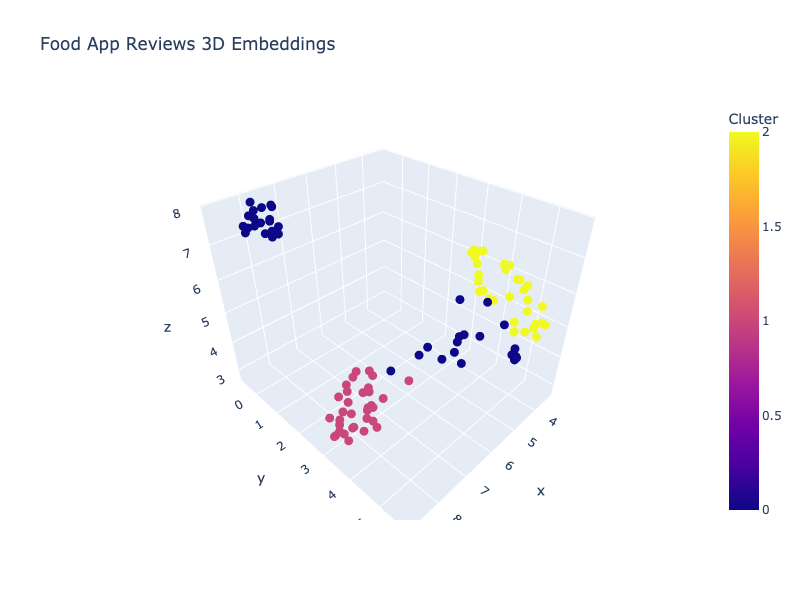

In [65]:
from IPython.display import Image
# Create a DataFrame for the data
cluster_df = pd.DataFrame({
    'x': embeddings_3d[:, 0],
    'y': embeddings_3d[:, 1],
    'z': embeddings_3d[:, 2],
    'label': cluster_labels,
    'sentence': data['Review']
})

# Create a 3D scatter plot using plotly
fig = px.scatter_3d(
    cluster_df,
    x='x', y='y', z='z',
    color='label',
    hover_name='sentence',
    title='Food App Reviews 3D Embeddings',
    labels={'label': 'Cluster'},
)

fig.update_traces(
    marker=dict(size=5)  # Adjust the size value as needed
)

# fig.show()

#For Github hosting purposes, 3d plots are not visible and hence saving the plot as png and displaying it
fig.write_image("3d_plot.png", width=800, height=600)


Image("3d_plot.png")


In [66]:
# !pip install -U kaleido
